# Solutions Tutorial 2

In this tutorial, we will see:

* The decomposition of the utility into observed component of utility and the random component. How randomness induces choice probabilities and finally what utility can and cannot be recovered when we only observe the results of the choices and not the full utility.

* Exercise our understanding of likelihood functions and how to use it to find good values for the parameters in our model by maximizing the likelihood.

**Please remember to save the notebook in your own google drive! (you can do this just as you open it and go from there)**

# 1) Intuition on Random Utility Models

Imagine a scenario where we are offering two products to the consumer base.
In our estimation, product A has more observed utility than product B, but because of 'randomness', we cannot perfectly predict the sales. We will explore how different random component of the utility affect the market share of these two products.

## 1.1) Create the two observed utility components: 10 and 8, and plot them as vertical lines, each on its own color.
*Create two python variables to hold the observed components of the utility, then create a simple plot of these two numbers as vertical lines*

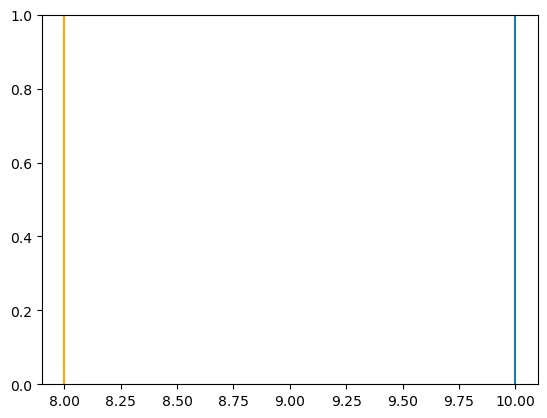

In [1]:
import matplotlib.pyplot as plt
vA = 10
vB = 8


plt.axvline(vA)
plt.axvline(vB, c='orange')

We will simulate 1000 consumers choosing between the two alternatives according to the random utility model. This means that there is a random component that is added to the observed utility to each of the alternatives
## 1.2) Add 1000 random values taken from a uniform distribution (-2, 2) to each of the two alternatives and plot the density functions around each alternative.
*This step will simulate the utility that 1000 independent consumers get for each product. We will end up with two vectors, one for product A and one for product B. The i-est element of the vector represents the utility that the i-est individial gets for that product, already considering the observed part and the random component of the utility. Instead of each consumer getting utility 10 for product A and utility 8 for product B, each consumer gets slightly different utility. Some consumers, because of this randomness, could end up preferring product B over product A, even though the 'observed' part of the utility would make everyone prefer product A.*

In [2]:

import numpy as np

num_samples = 1000

np.random.seed(1234)

#we could be using np.random.uniform here instead of np.random.rand and some manual scaling to simulate the uniform
eA = np.random.rand(num_samples)*4 - 2
eB = np.random.rand(num_samples)*4 - 2

uA = vA + eA
uB = vB + eB

We will plot the density function, this time adding the vertical lines that pass through the observed utility part to act as a reference.

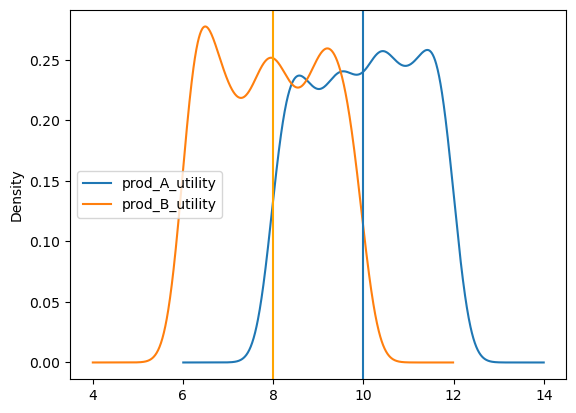

In [3]:
import pandas as pd
df = pd.DataFrame({'prod_A_utility':uA, 'prod_B_utility':uB})
df.plot(kind='density')
plt.axvline(vA)
plt.axvline(vB, c='orange')

We see that the probability distributions overlap, which means that there is a chance that the utility of product B is large than the utility of product A, even though the observed part is not.

If there was no random component, a consumer will always choose the option with the larger observed utility. But because of the random component, there is a chance that the product with less observed utility ends up being the one with the larger total utility. This is visualized by the overlapping density function in the plot. Because of randomness, we will need to talk about choice probabilities, it is the best we can do, we cannot perfectly predict the choice.
## 1.3) Calculate the choice probabilities for the first item. (counting how many times its utility is larger than the utility of other item).

In [4]:
np.mean(uA > uB)

0.883

The larger the variance of the random component, the more 'random' the choices are. We can see how this affects the choice probabilities by simulating different scenarios where the only thing that changes is the variance of the random component. In the uniform distribution, we can just play with the range of the distribution, keeping it centered in 0.

## 1.4) Try creating a plot of the choice probability of the first item with respect to the range of the uniform distribution centered in 0 (eg. U(0,0), U(-0.1, 0.1), U(-0.2, 0.2), ... U(-10, 10).

*Simulate serveral scenarios with more and more variance in the random component, the more variance the more the choice probabilities go to 0.5 for each product (even though product A will always have higher chance of being chosen than product B).*

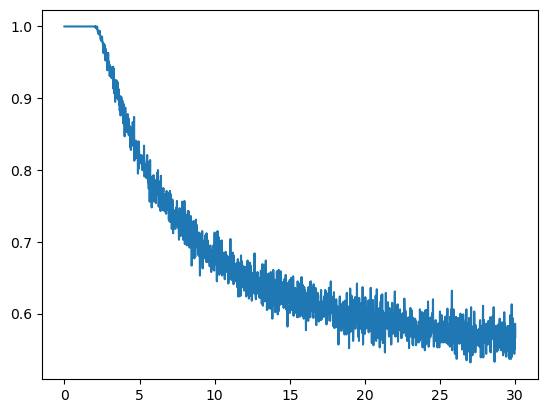

In [5]:

rang = np.linspace(0, 30, num=2000)

def prob_range(range):
 range_uA = vA + np.random.rand(num_samples) * range - range/2
 range_uB = vB + np.random.rand(num_samples) * range - range/2
 return np.mean(range_uA > range_uB)

probs= [prob_range(range) for range in rang]

plt.plot(rang, probs)



---
---





We will now see a few limitations of the utility that can be recovered from the data. We will see that the different possible values of utility produce the same choice probabilities. Therefore there are many values for the utility that are consistent with the experimental observations, and we cannot know which one is the 'true' one.

## 1.5) Going back to the first scenario (the result of Exercise 1.2)
 * ## Create a new choice scenario of two alternatives by adding the same constant (nonzero please) to the utilities of product A and product B (you would get two new vectors of utilities).
 * ## Plot the densities together with the original ones, using different colors (please choose the constant so the plot looks nice and is not too far away from the original densities).
 * ## Then compute the choice probabilities of the new setting, the one with the added constant.

## Do the choice probabilities change, compared to the original ones? Do you think that the true utility can be recovered when we only observe the results of the choices?

*Add a constant to the utilities in the experiment to simulate 'another' scenario when the observed components of utility are different from the original, the plot everything together to get a visual understanding on how different the two scenarios are.*


<AxesSubplot:ylabel='Density'>

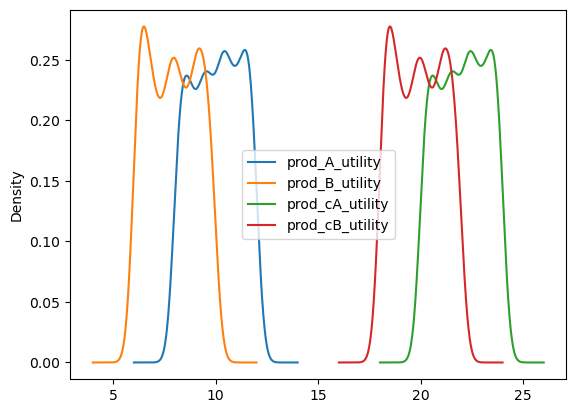

In [6]:
my_add_const = 12
cuA = uA + my_add_const
cuB = uB + my_add_const
pd.DataFrame({'prod_A_utility':uA, 'prod_B_utility':uB,
              'prod_cA_utility': cuA,
              'prod_cB_utility': cuB}).plot(kind='density')

In [7]:
print('Probability of choosing A in the Original utilities scenario:', np.mean(uA > uB))
print('Probability of choosing A in the Additive constant utilities scenario:', np.mean(cuA > cuB))

Probability of choosing A in the Original utilities scenario: 0.883
Probability of choosing A in the Additive constant utilities scenario: 0.883



When we add a constant to the observed components, the choice probabilities remain the same. A consequence of that is that when we only observe the choice proabilities, as is the case in experimental data, we can recover many possible values for the observed utility, all consistent with the data. Therefore we do not know which one is the 'true value' for the observed component.

## 1.6) Repeat 1.5, but instead of *adding* a constant to the utilities, *multiply* the utilities by a constant (positive).


Probability of choosing A in the Original utilities scenario: 0.883
Probability of choosing A in the Multiplicative constant utilities scenario: 0.883


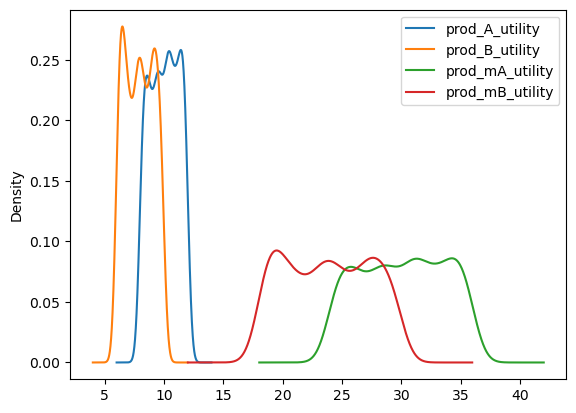

In [8]:
my_multi_const = 3
muA = uA * my_multi_const
muB = uB * my_multi_const
pd.DataFrame({'prod_A_utility':uA, 'prod_B_utility':uB,
              'prod_mA_utility': muA,
              'prod_mB_utility': muB}).plot(kind='density')

print('Probability of choosing A in the Original utilities scenario:', np.mean(uA > uB))
print('Probability of choosing A in the Multiplicative constant utilities scenario:', np.mean(muA > muB))

Consider that the choice probabilties do not change when adding a constant or when multiplying by a constant:
Do you think that values of the utility can be recovered, or only the relative order of the preferences?
This is what is called Cardinal utility vs Ordinal utility.

In cardinal utility, the values of the utility are meaningful, in ordinal utility, they can only represent the relative order between a set of alternatives.

As a consequence, do you think that two set of utilities that have been estimated separately can be compared? For example, on one hand we have a dataset about coffee preferences from which we recover the utilies for the alternatives latte, espresso, long black. On the other hand we have a dataset about car preference, we recover the preferences for van, sedan, and sports car.
Will be able to compare utilities from the coffee dataset to utilities from the car dataset in a meaningful way? Will we be able to know what alternatives produce the most utility across datasets, for example a latte vs a sports car?




---
---




We will now see that the type of probability distribution of the noise does not affect the choice probabilities, therefore this is another piece of the RUM that cannot be truly recovered from the experimental data.

## 1.7) Change the distribution of the random component in the original experiment form a U(-2,2) to a Gaussian with mean 0 and variance $\frac{16}{12}$. Do the choice probabilities change (much)?
*It is unlikely that we will get exactly the same choice probabilities, but it will be clear that we could make them arbitrarily close if we tune the variance of the gaussian.*


In [9]:
#we scale them down a bit, see that the choice probabilities are very similar to the noise
gauss_eA = np.random.normal(0, 14.5/12, num_samples)
gauss_eB = np.random.normal(0, 14.5/12, num_samples)

gauss_uA = vA + gauss_eA
gauss_uB = vB + gauss_eB

<AxesSubplot:ylabel='Density'>

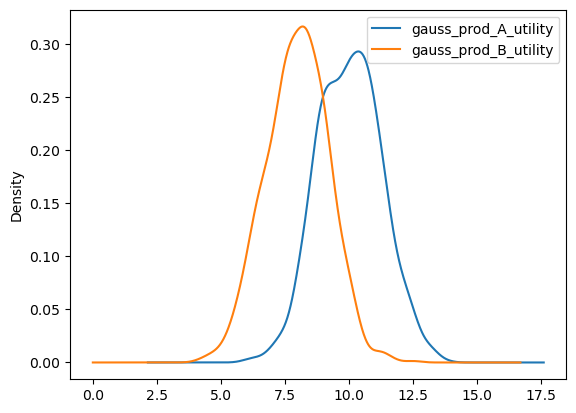

In [10]:
pd.DataFrame({'gauss_prod_A_utility':gauss_uA, 'gauss_prod_B_utility':gauss_uB}).plot(kind='density')

In [11]:
np.mean(gauss_uA > gauss_uB)

0.885

The consequence is that the distribution of the random component cannot be recovered, since there are many distribution that will lead to the same choice probabilities. In practice, it will depend on the model that we the analysts assume for the observed component.

# 1.8) Finally, try a different distribution for each of the alternatives, e.g. Uniform for product A, Gaussian for product B, play with the parameters of the distributions to see if you can reach the same choice probabilities as in other sections

*This exercise is for extra clarification*


<AxesSubplot:ylabel='Density'>

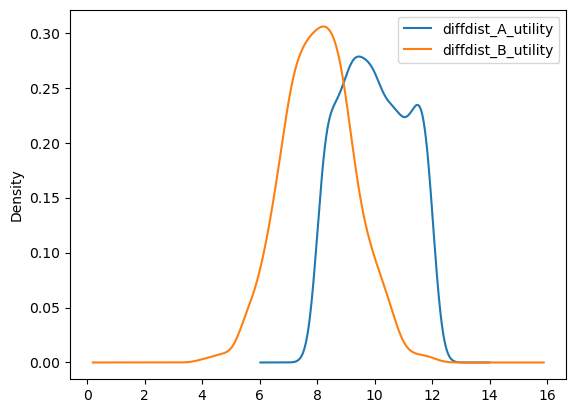

In [12]:
uniform_eA = np.random.uniform(-2, 2, num_samples)
gauss_2_eB = np.random.normal(0, 14.5/12, num_samples)

diffdist_uA = vA + uniform_eA
diffdist_uB = vB + gauss_2_eB

pd.DataFrame({'diffdist_A_utility':diffdist_uA, 'diffdist_B_utility':diffdist_uB}).plot(kind='density')

In [13]:
np.mean(diffdist_uA > diffdist_uB)

0.869

The choice probabilities are similar enough, though we could fine tune it to make it better.

---
---
